<a href="https://colab.research.google.com/github/albalopezdevesa/PROYECTO-INTEGRADOR-III/blob/main/Proyecto_Integrador_III_Analisis_descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis descriptivo

In [ ]:
# Importamos librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import seaborn as sns
import geopandas as gpd

In [ ]:
datosl = pd.read_excel("datos_limpios.xlsx")

In [ ]:
datosl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58938 entries, 0 to 58937
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        58938 non-null  object        
 1   fecha                 58938 non-null  datetime64[ns]
 2   hora                  58938 non-null  float64       
 3   distrito              58938 non-null  object        
 4   estado_meteorológico  58938 non-null  object        
 5   tipo_vehiculo         58938 non-null  object        
 6   tipo_persona          58938 non-null  object        
 7   rango_edad            58938 non-null  object        
 8   sexo                  58938 non-null  object        
 9   lesividad             58938 non-null  object        
 10  coordenada_x_utm      58923 non-null  float64       
 11  coordenada_y_utm      58923 non-null  float64       
 12  positiva_alcohol      58938 non-null  object        
 13  positiva_droga  

# Sexo, edad y día de la semana

Sexo y edad

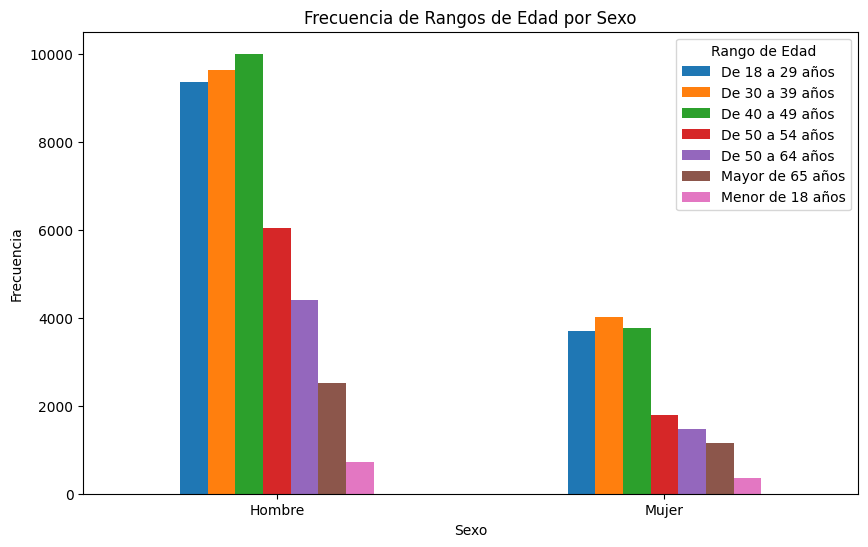

In [ ]:
# Calcular la frecuencia de rangos de edad por sexo
frecuencia_por_sexo = datosl.groupby(['sexo', 'rango_edad']).size().unstack()

# Crear el gráfico de barras
frecuencia_por_sexo.plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de Rangos de Edad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.legend(title='Rango de Edad')
plt.show()

Test de Kolmogorov-Smirnov(KS) para dos muestras. Busca comparar la distribución de edades entre dos categorías de sexo.

In [ ]:
# Obtener las edades para cada categoría de sexo
edades_hombres = datosl[datosl['sexo'] == 'Hombre']['rango_edad']
edades_mujeres = datosl[datosl['sexo'] == 'Mujer']['rango_edad']

# Realizar el test de Kolmogorov-Smirnov
statistic, p_value = ks_2samp(edades_hombres, edades_mujeres)

# Imprimir los resultados
print("Estadístico KS:", statistic)
print("\nValor p:", p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("\nSe rechaza la hipótesis nula. Las muestras tienen distribuciones diferentes.")
else:
    print("\nNo se puede rechazar la hipótesis nula. No hay suficiente evidencia para concluir que las muestras tienen distribuciones diferentes.")

Estadístico KS: 0.030124540220412943

Valor p: 1.0456877342360374e-09

Se rechaza la hipótesis nula. Las muestras tienen distribuciones diferentes.


Día de la semana y edad

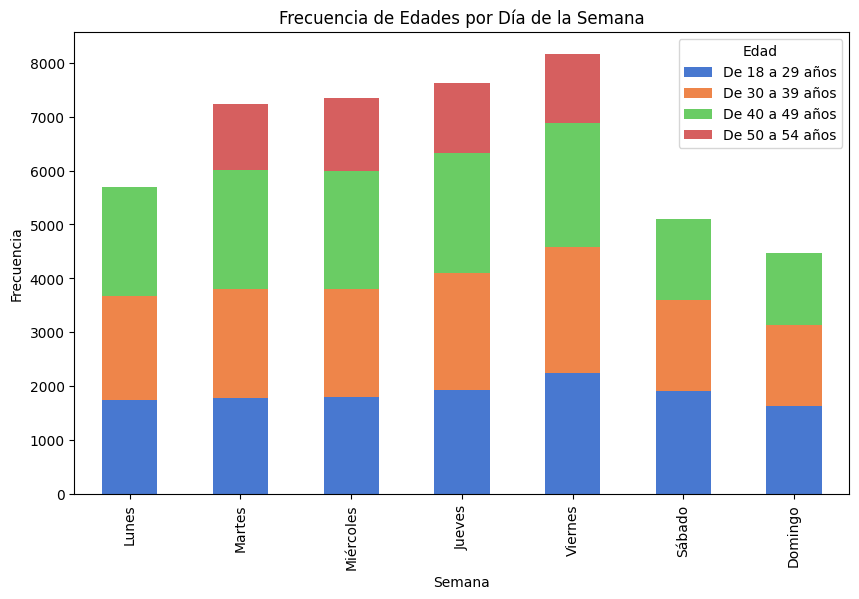

In [ ]:
# Calculamos la frecuencia de edades para cada día de la semana
frecuencia_por_dia = datosl.groupby('num_dia_semana')['rango_edad'].value_counts().unstack(fill_value=0)

# Filtramos las frecuencias que superan 1500
frecuencia_filtrada = frecuencia_por_dia[frecuencia_por_dia > 1200].fillna(0)

# Filtramos solo los dos primeros rangos de edad
frecuencia_filtrada = frecuencia_filtrada.iloc[:, :4]

dias_semana_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Creamos una paleta de colores personalizada
colores = sns.color_palette("muted")

# Creamos el gráfico de barras con la nueva paleta de colores
frecuencia_filtrada.plot(kind='bar', stacked=True, figsize=(10, 6), color=colores)
plt.xlabel('Semana')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Edades por Día de la Semana')
plt.xticks(ticks=range(len(dias_semana_ordenados)), labels=dias_semana_ordenados)  # Usamos los días de la semana ordenados

plt.legend(title='Edad', bbox_to_anchor=(1, 1))

plt.show()

# Lesividad

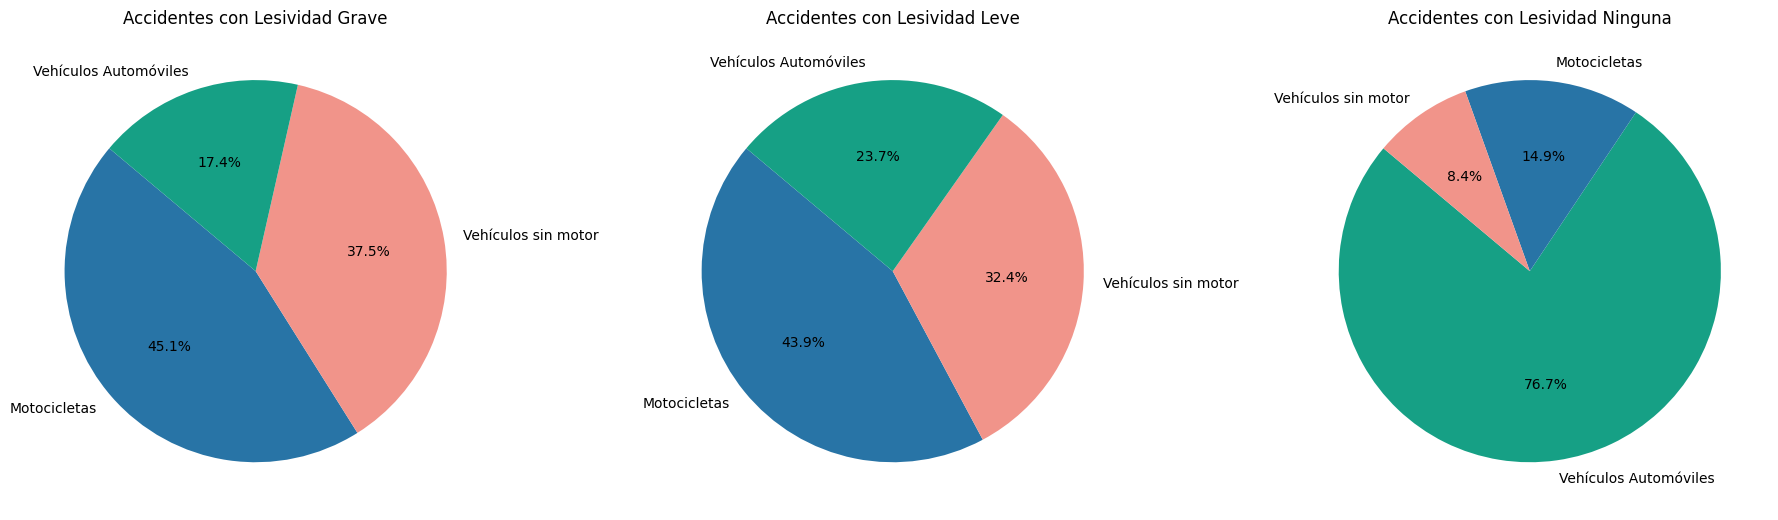

In [ ]:
data = datosl[(datosl['tipo_vehiculo'] != 'Pesados') & (datosl['tipo_vehiculo'] != 'Desconocido')]

# Crear subconjuntos de datos para cada nivel de lesividad
datos_graves = data[data['lesividad'] == 'grave']
datos_leves = data[data['lesividad'] == 'leve']
datos_ninguna = data[data['lesividad'] == 'ninguna']

# Obtener el conteo de tipos de vehículos para cada nivel de lesividad
conteo_tipo_vehiculo_grave = datos_graves['tipo_vehiculo'].value_counts()
conteo_tipo_vehiculo_leve = datos_leves['tipo_vehiculo'].value_counts()
conteo_tipo_vehiculo_ninguna = datos_ninguna['tipo_vehiculo'].value_counts()

colores_vehiculos = {
    'Vehículos Automóviles': '#16A085',
    'Motocicletas': '#2874A6',
    'Vehículos sin motor': '#F1948A'
}

# Crear figura con tres subplots (uno para cada nivel de lesividad)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart para lesividad "Grave"
axs[0].pie(conteo_tipo_vehiculo_grave, labels=conteo_tipo_vehiculo_grave.index, autopct='%1.1f%%', startangle=140, colors=[colores_vehiculos.get(cat,  '#cccccc') for cat in conteo_tipo_vehiculo_grave.index.tolist()])
axs[0].set_title('Accidentes con Lesividad Grave')

# Pie chart para lesividad "Leve"
axs[1].pie(conteo_tipo_vehiculo_leve, labels=conteo_tipo_vehiculo_leve.index, autopct='%1.1f%%', startangle=140, colors=[colores_vehiculos.get(cat, '#cccccc') for cat in conteo_tipo_vehiculo_leve.index.tolist()])
axs[1].set_title('Accidentes con Lesividad Leve')

# Pie chart para lesividad "Ninguna"
axs[2].pie(conteo_tipo_vehiculo_ninguna, labels=conteo_tipo_vehiculo_ninguna.index, autopct='%1.1f%%', startangle=140, colors=[colores_vehiculos.get(cat, '#cccccc') for cat in conteo_tipo_vehiculo_ninguna.index.tolist()])
axs[2].set_title('Accidentes con Lesividad Ninguna')


plt.tight_layout()


plt.show()

# Mapas de calor

Sobre el total de los datos:

<ipython-input-48-15a6cdd5c4c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-48-15a6cdd5c4c4>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


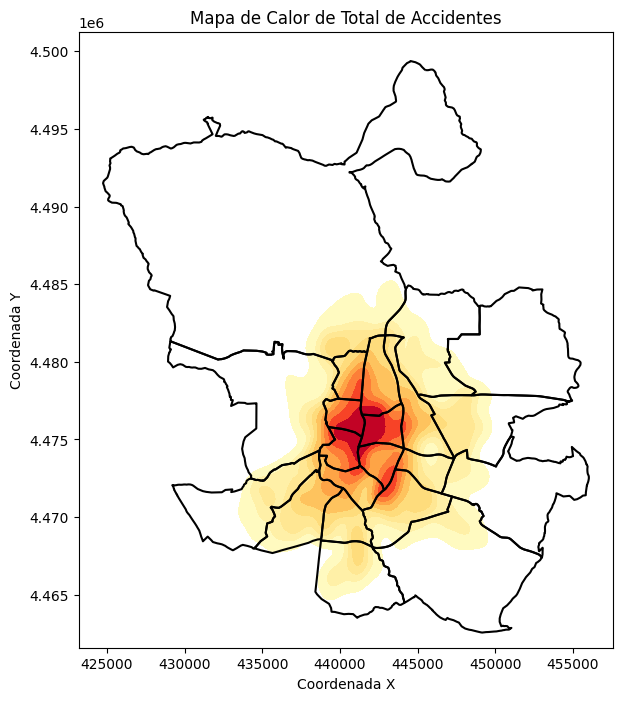

In [ ]:
# Crear un nuevo dataframe con todas las coordenadas
datos_coordenadas = datosl[['coordenada_x_utm', 'coordenada_y_utm']]
datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)

# Comprobar y eliminar valores atípicos en las coordenadas si es necesario
datos_coordenadas = datos_coordenadas[
    (datos_coordenadas['coordenada_x_utm'] >= 420000) &
    (datos_coordenadas['coordenada_x_utm'] <= 470000) &
    (datos_coordenadas['coordenada_y_utm'] >= 440000) &
    (datos_coordenadas['coordenada_x_utm'] <= 450000)
]

# Cargar los límites de los distritos de Madrid
distritos_madrid = gpd.read_file('Distritos.json')

# Crear un gráfico de calor del total de los accidentes
plt.figure(figsize=(10, 8))
sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)
plt.title('Mapa de Calor de Total de Accidentes')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Añadir límites de distritos de Madrid
distritos_madrid.plot(ax=plt.gca(), edgecolor='black', facecolor='none')

plt.show()

Teniendo en cuenta la hora:

<ipython-input-49-01b3aecb17d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-49-01b3aecb17d5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


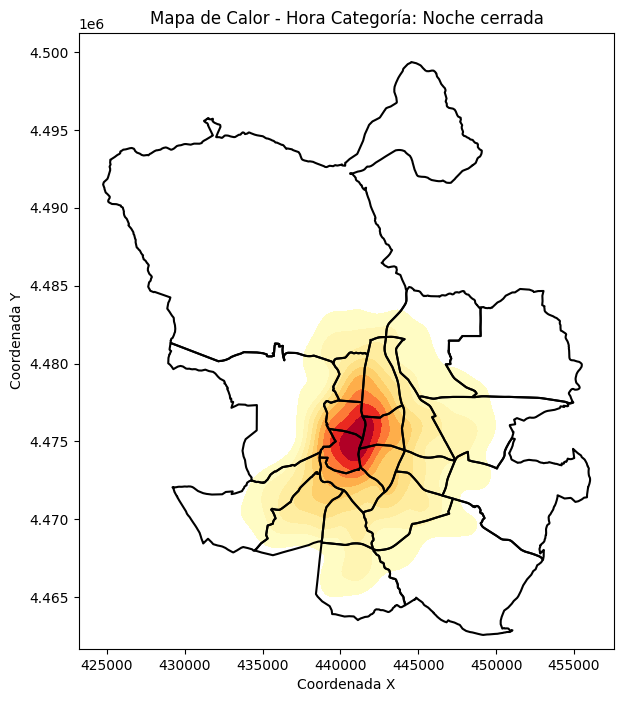

<ipython-input-49-01b3aecb17d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-49-01b3aecb17d5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


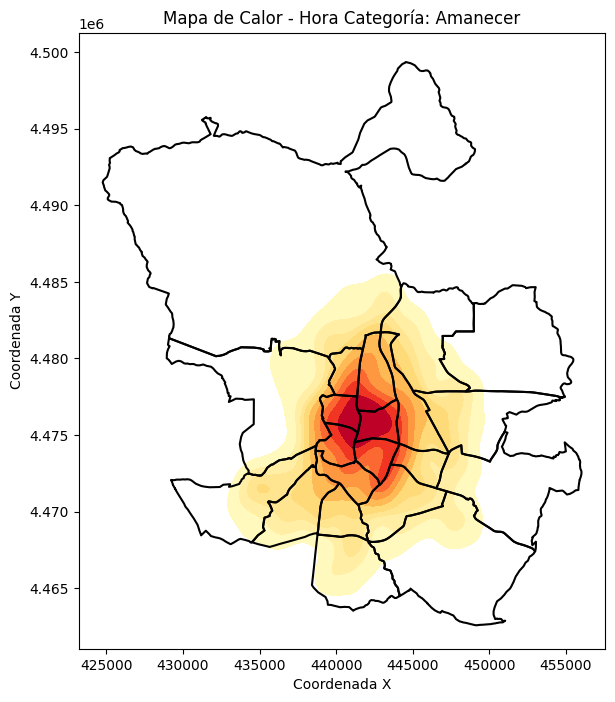

<ipython-input-49-01b3aecb17d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-49-01b3aecb17d5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


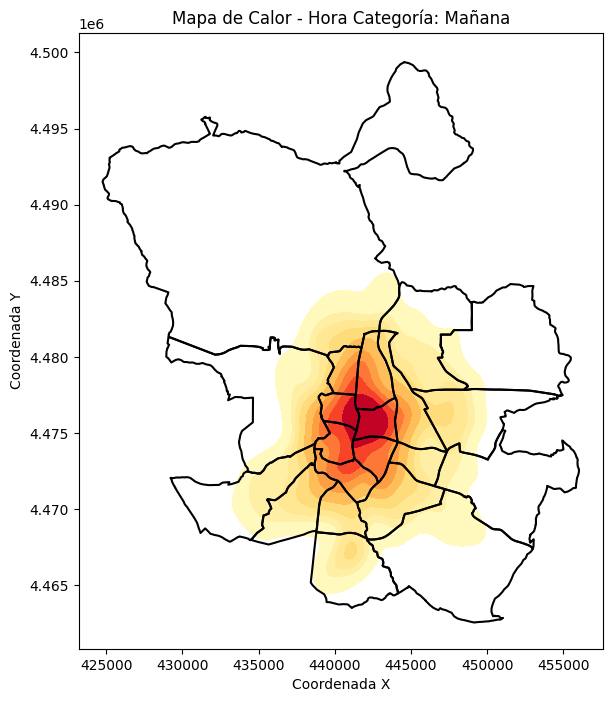

<ipython-input-49-01b3aecb17d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-49-01b3aecb17d5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


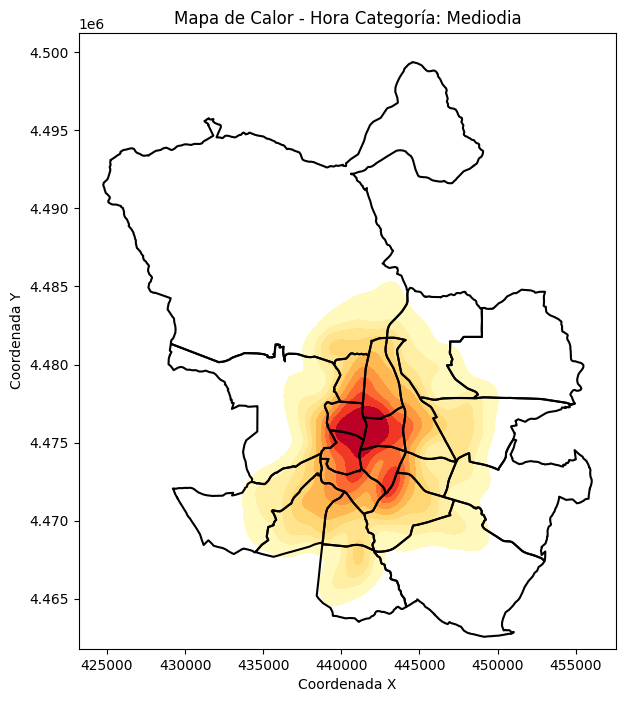

<ipython-input-49-01b3aecb17d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-49-01b3aecb17d5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


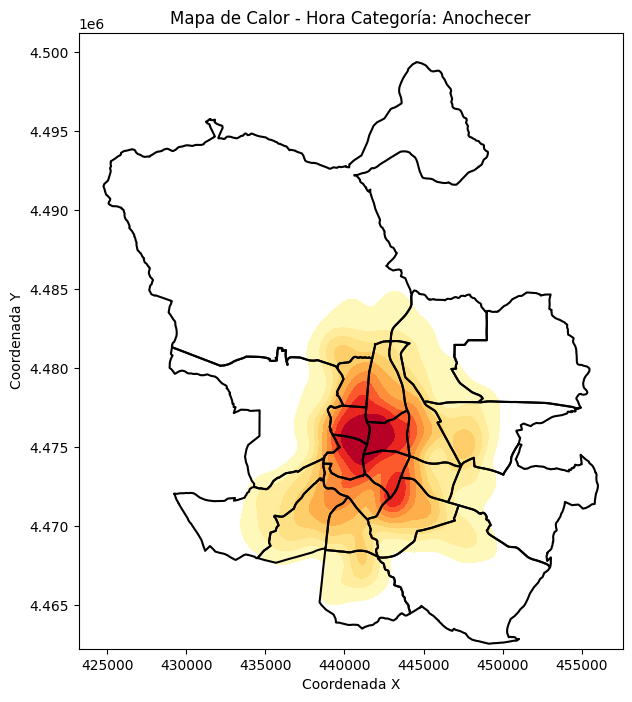

<ipython-input-49-01b3aecb17d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-49-01b3aecb17d5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


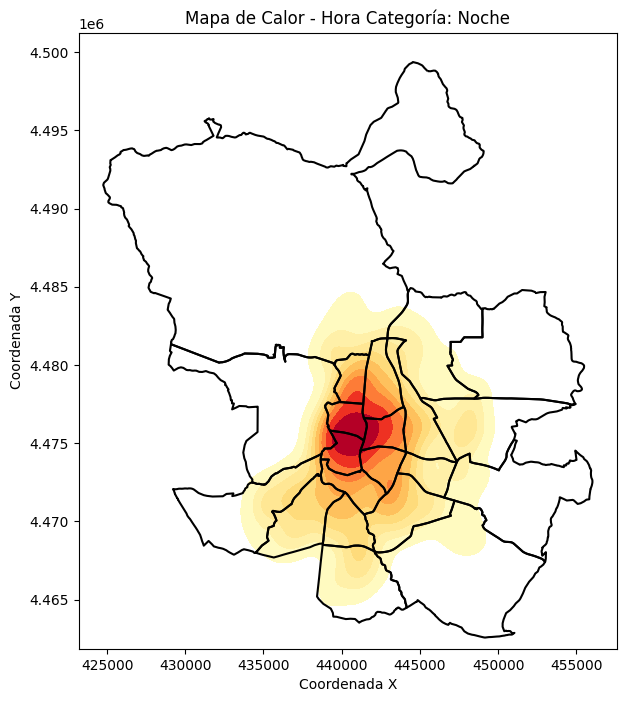

<ipython-input-49-01b3aecb17d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)
<ipython-input-49-01b3aecb17d5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)


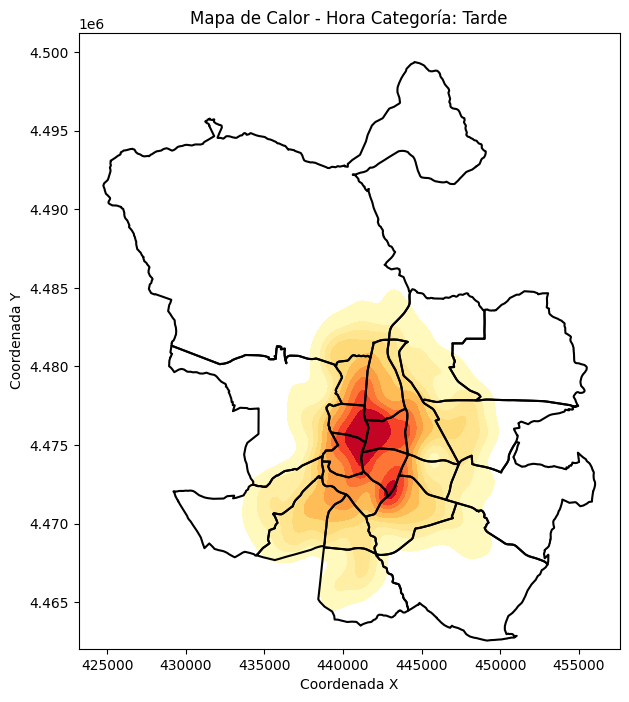

In [ ]:
# Obtener todas las categorías únicas de 'hora_categoria'
categorias = datosl['hora_categoria'].unique()

# Cargar los límites de los distritos de Madrid
distritos_madrid = gpd.read_file('Distritos.json')

# Iterar sobre cada categoría y generar un mapa de calor en una subtrama diferente
for categoria in categorias:
    # Filtrar los datos por la categoría actual
    datos = datosl[datosl['hora_categoria'] == categoria]

    # Crear un nuevo dataframe con las coordenadas
    datos_coordenadas = datos[['coordenada_x_utm', 'coordenada_y_utm']]
    datos_coordenadas.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'], inplace=True)

    # Comprobar y eliminar valores atípicos en las coordenadas
    datos_coordenadas = datos_coordenadas[
        (datos_coordenadas['coordenada_x_utm'] >= 420000) &
        (datos_coordenadas['coordenada_x_utm'] <= 470000) &
        (datos_coordenadas['coordenada_y_utm'] >= 440000) &
        (datos_coordenadas['coordenada_x_utm'] <= 450000)
    ]

    # Crear un gráfico de calor
    plt.figure(figsize=(10, 8))
    sns.kdeplot(x=datos_coordenadas['coordenada_x_utm'], y=datos_coordenadas['coordenada_y_utm'], cmap='YlOrRd', shade=True, thresh=0.05)
    plt.title(f'Mapa de Calor - Hora Categoría: {categoria}')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')

    # Añadir límites de distritos de Madrid
    distritos_madrid.plot(ax=plt.gca(), edgecolor='black', facecolor='none')

    plt.show()

# Alcohol

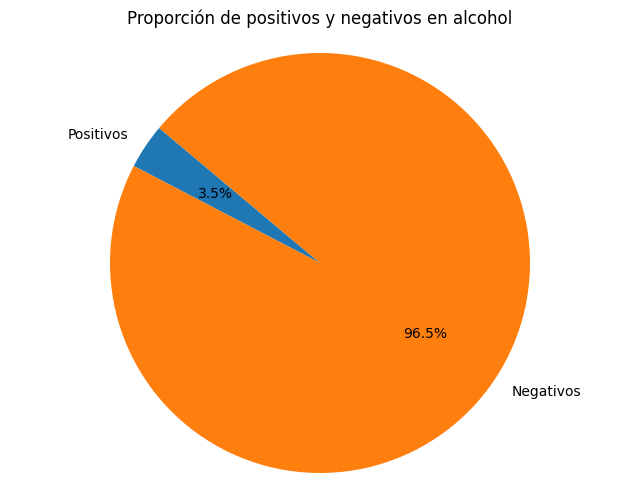

In [ ]:
positivos_alcohol = datosl[datosl['positiva_alcohol'] == 'S'].shape[0]
negativos_alcohol = datosl[datosl['positiva_alcohol'] == 'N'].shape[0]

# Crear una lista con los valores para el pie chart
sizes = [positivos_alcohol, negativos_alcohol]
labels = ['Positivos', 'Negativos']

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de positivos y negativos en alcohol')
plt.axis('equal')
plt.show()

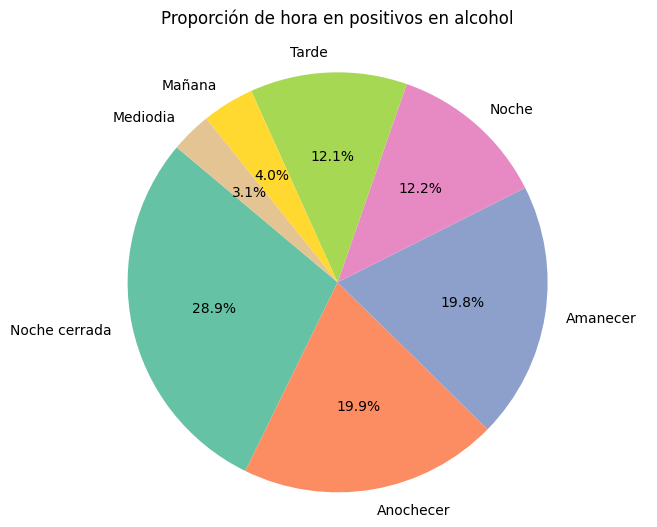

In [ ]:
# Filtrar solo los casos positivos en alcohol
positivos_alcohol = datosl[datosl['positiva_alcohol'] == 'S']

# Contar la proporción de cada categoría de hora
proporcion_horas = positivos_alcohol['hora_categoria'].value_counts(normalize=True)

# Cambiar la paleta de colores
colores = sns.color_palette("Set2")

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(proporcion_horas, labels=proporcion_horas.index, autopct='%1.1f%%', startangle=140, colors = colores)
plt.title('Proporción de hora en positivos en alcohol',pad=20)
plt.axis('equal')
plt.show()

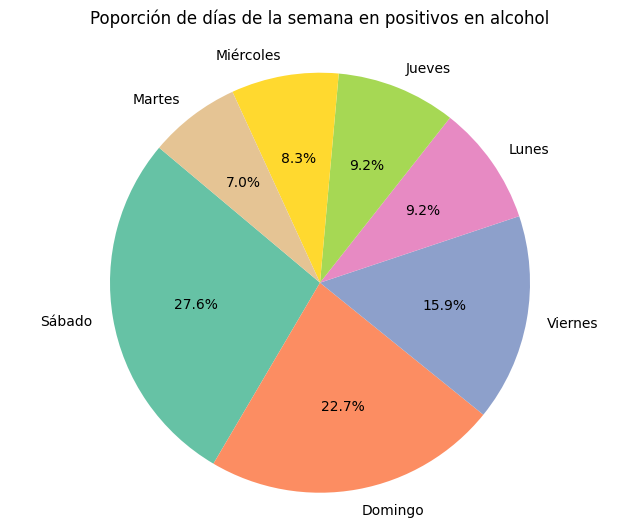

In [ ]:
# Lista de nombres de días de la semana
nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Filtrar solo los casos positivos en alcohol
positivos_alcohol = datosl[datosl['positiva_alcohol'] == 'S']

# Contar la proporción de cada categoría de hora
proporcion_dias = positivos_alcohol['num_dia_semana'].value_counts(normalize=True)

# Cambiar la paleta de colores
colores = sns.color_palette("Set2")

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(proporcion_dias, labels=[nombres_dias[num] for num in proporcion_dias.index], autopct='%1.1f%%', startangle=140, colors = colores)
plt.title('Poporción de días de la semana en positivos en alcohol', pad=20)  # Ajuste de espacio con el título
plt.axis('equal')
plt.show()

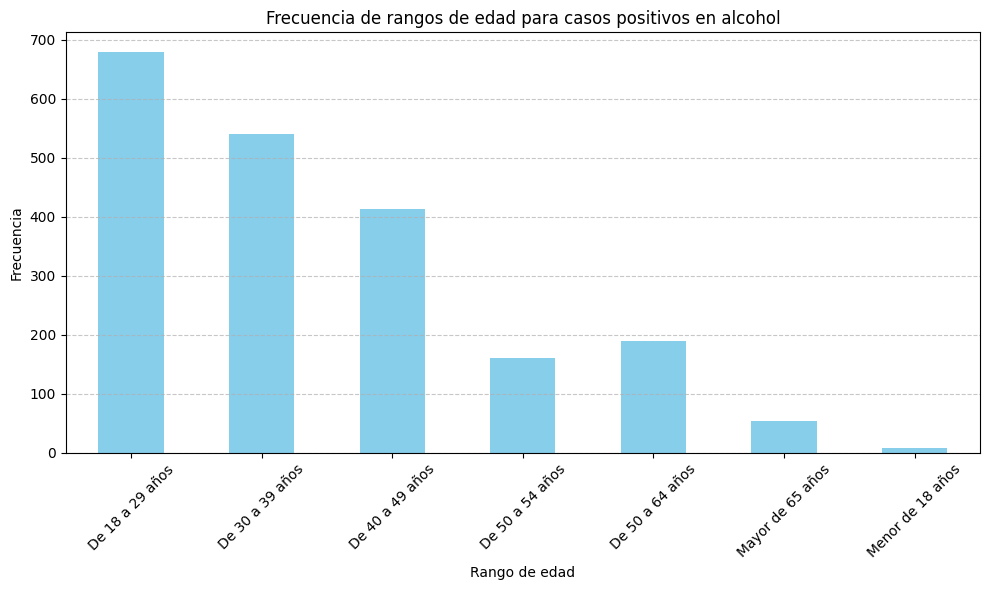

In [ ]:
# Filtrar solo los casos positivos en alcohol
positivos_alcohol = datosl[datosl['positiva_alcohol'] == 'S']

# Contar la frecuencia de cada rango de edad
frecuencia_edad = positivos_alcohol['rango_edad'].value_counts()

# Ordenar los rangos de edad para que aparezcan en orden ascendente en el gráfico
frecuencia_edad = frecuencia_edad.sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_edad.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de rangos de edad para casos positivos en alcohol')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar los nombres de los rangos de edad para una mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una rejilla horizontal
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()

# Droga

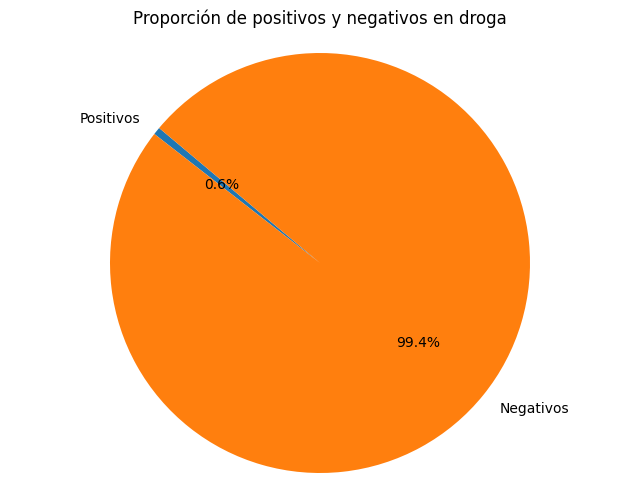

In [ ]:
positivos_alcohol = datosl[datosl['positiva_droga'] == 1].shape[0]
negativos_alcohol = datosl[datosl['positiva_droga'] == 0].shape[0]

# Crear una lista con los valores para el pie chart
sizes = [positivos_alcohol, negativos_alcohol]
labels = ['Positivos', 'Negativos']

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de positivos y negativos en droga')
plt.axis('equal')
plt.show()

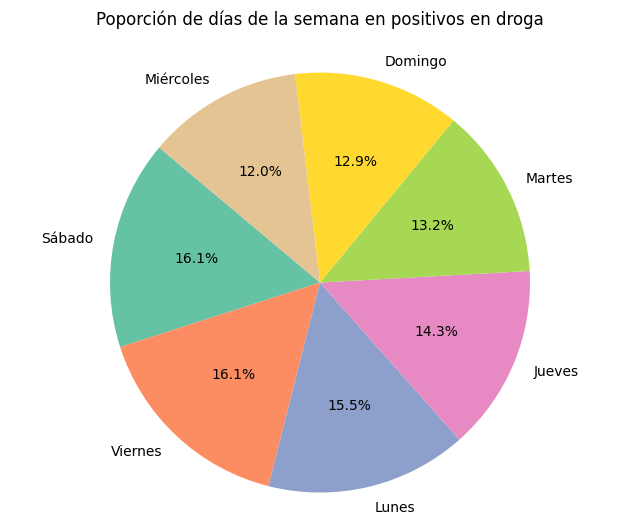

In [ ]:
# Lista de nombres de días de la semana
nombres_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Filtrar solo los casos positivos en alcohol
positivos_alcohol = datosl[datosl['positiva_droga'] == 1]

# Contar la proporción de cada categoría de hora
proporcion_dias = positivos_alcohol['num_dia_semana'].value_counts(normalize=True)

# Cambiar la paleta de colores
colores = sns.color_palette("Set2")

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(proporcion_dias, labels=[nombres_dias[num] for num in proporcion_dias.index], autopct='%1.1f%%', startangle=140, colors = colores)
plt.title('Poporción de días de la semana en positivos en droga', pad=20)
plt.axis('equal')
plt.show()

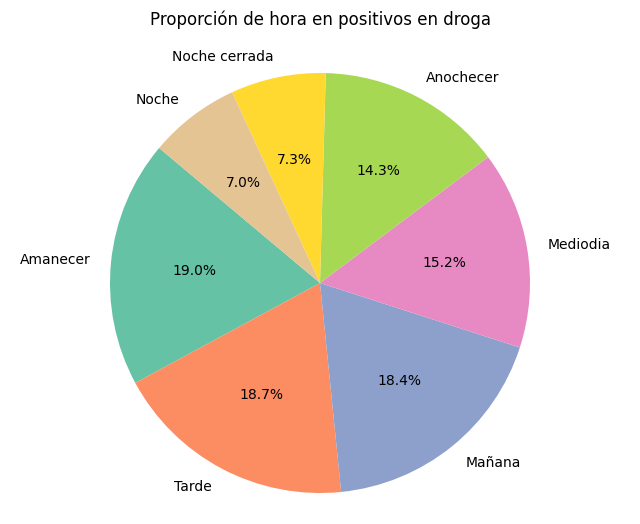

In [ ]:
# Filtrar solo los casos positivos en alcohol
positivos_alcohol = datosl[datosl['positiva_droga'] == 1]

# Contar la proporción de cada categoría de hora
proporcion_horas = positivos_alcohol['hora_categoria'].value_counts(normalize=True)

# Cambiar la paleta de colores
colores = sns.color_palette("Set2")

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(proporcion_horas, labels=proporcion_horas.index, autopct='%1.1f%%', startangle=140, colors = colores)
plt.title('Proporción de hora en positivos en droga',pad=20)
plt.axis('equal')
plt.show()

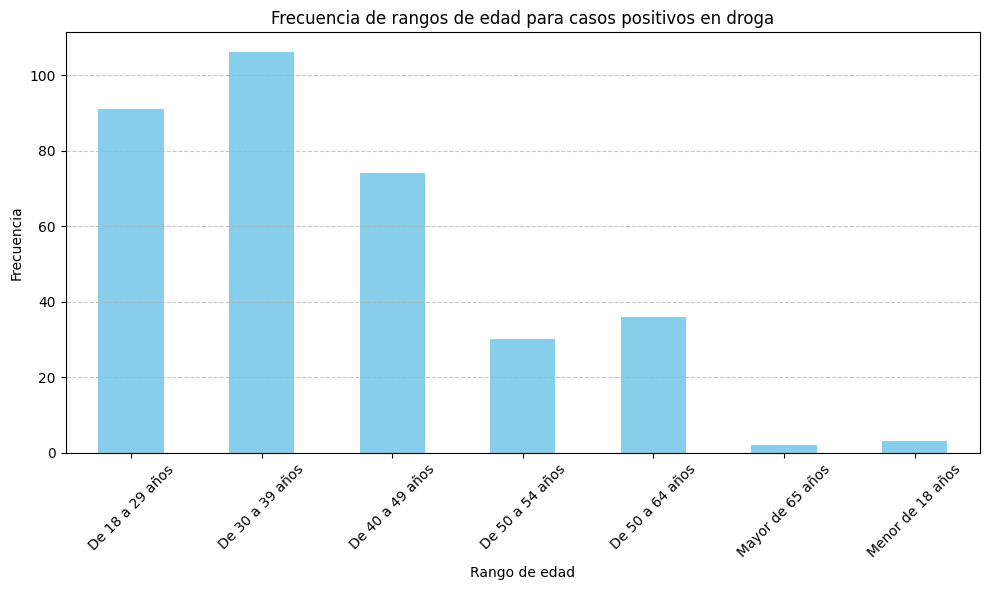

In [ ]:
# Filtrar solo los casos positivos en alcohol
positivos_alcohol = datosl[datosl['positiva_droga'] == 1]

# Contar la frecuencia de cada rango de edad
frecuencia_edad = positivos_alcohol['rango_edad'].value_counts()

# Ordenar los rangos de edad para que aparezcan en orden ascendente en el gráfico
frecuencia_edad = frecuencia_edad.sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_edad.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de rangos de edad para casos positivos en droga')
plt.xlabel('Rango de edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar los nombres de los rangos de edad para una mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una rejilla horizontal
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()

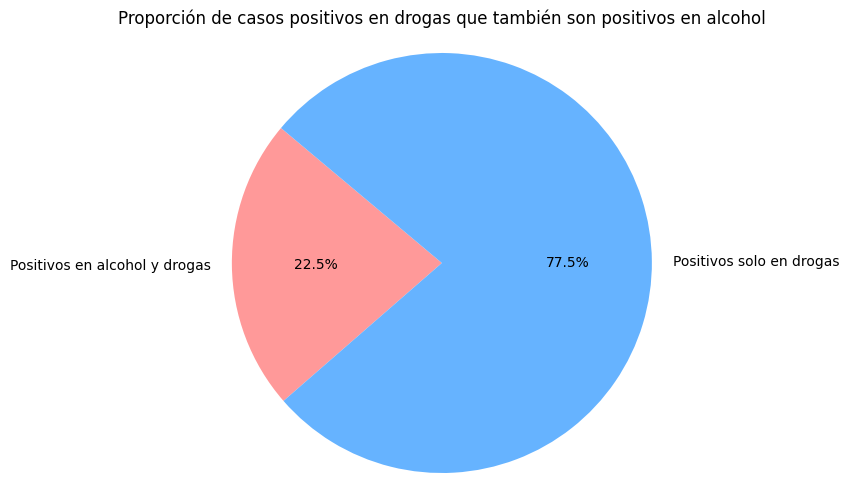

In [ ]:
# Contar la cantidad de casos positivos en drogas que también son positivos en alcohol
positivos_alcohol_drogas = datosl[(datosl['positiva_alcohol'] == 'S') & (datosl['positiva_droga'] == 1)].shape[0]

# Contar la cantidad de casos positivos en drogas que no son positivos en alcohol
positivos_drogas_no_alcohol = datosl[(datosl['positiva_alcohol'] == 'N') & (datosl['positiva_droga'] == 1)].shape[0]

# Crear una lista con los valores para el pie chart
sizes = [positivos_alcohol_drogas, positivos_drogas_no_alcohol]
labels = ['Positivos en alcohol y drogas', 'Positivos solo en drogas']

# Definir una paleta de colores personalizada
colors = ['#ff9999', '#66b3ff']

# Crear el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proporción de casos positivos en drogas que también son positivos en alcohol')
plt.axis('equal')  # Asegurar que el gráfico de pastel sea circular
plt.show()